# Just for Consumer_complaint_narrative

In [113]:
import pandas as pd
import numpy as np
from datetime import datetime

from nltk import word_tokenize 

from farhad.TextTalent import plot_frequency_distribution_of_ngrams, plot_sample_length_distribution 
from wordcloud import WordCloud
from dask import delayed


from package.TextEditor import EstimateFaster
from package.TextEditor import Remove_stop_words
from package.TextEditor import List_cleaner

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [97]:
df_data = pd.read_csv('data/complains_data.csv')
df_data.columns =['Date_received','Product', 'Sub_product', 'Issue', 'Sub_issue',
       'Consumer_complaint_narrative', 'Company_public_response', 'Company',
       'State', 'ZIP_code', 'Submitted_via', 'Date_sent_to_company','Company_response_to_consumer',
       'Complaint_ID']

In [3]:
df_data.head(2)

,Date_received,Product,Sub_product,Issue,Sub_issue,Consumer_complaint_narrative,Company_public_response,Company,State,ZIP_code,Submitted_via,Date_sent_to_company,Company_response_to_consumer,Complaint_ID
0,10/01/2016,Credit reporting,NaN,Incorrect information on credit report,Account status,I have outdated information on my credit repor...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,352XX,Web,10/05/2016,Closed with explanation,2141773
1,10/17/2016,Consumer Loan,Vehicle loan,Managing the loan or lease,NaN,I purchased a new car on XXXX XXXX. The car de...,NaN,"CITIZENS FINANCIAL GROUP, INC.",PA,177XX,Web,10/20/2016,Closed with explanation,2163100


In [4]:
df = pd.DataFrame()
df[['Complaint_ID','Consumer']] = df_data[['Complaint_ID','Consumer_complaint_narrative']]

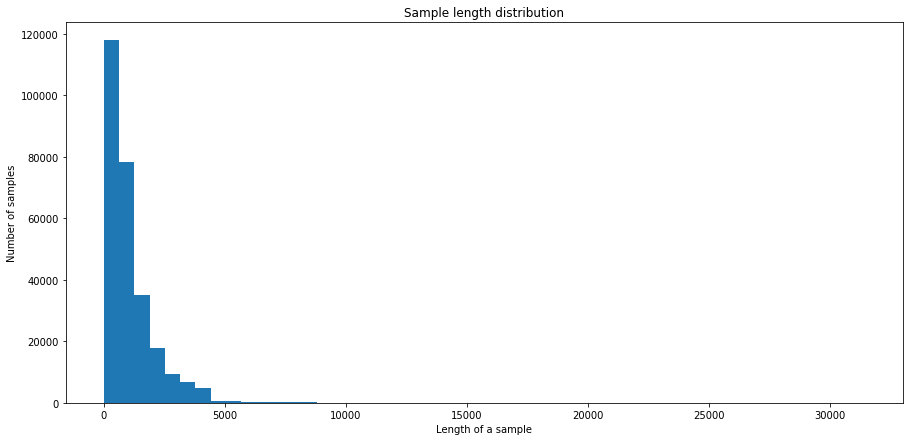

In [7]:
plt.figure(figsize=(15,7))
plot_sample_length_distribution(df.Consumer)

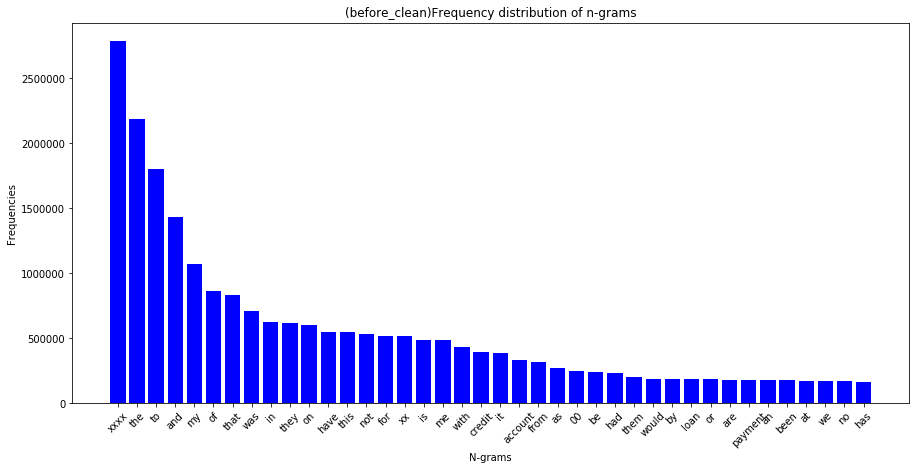

In [112]:
plt.figure(figsize=(15,7))
plot_frequency_distribution_of_ngrams(df['Consumer'],ngram_range=(1, 2),
                                      num_ngrams=40,title='(before_clean)Frequency distribution of n-grams')

# Let's start to clean

In [5]:
%%time
texts = delayed(List_cleaner)(df.Consumer)
texts = delayed(Remove_stop_words)(texts)
df['clean_Consumer'] = texts.compute()

[272657/272657][Clean every text]-- Done! --
[272657/272657][Remove stop_words]*** Done! ***
CPU times: user 10min 3s, sys: 32.8 s, total: 10min 35s
Wall time: 10min 34s


In [6]:
df.head()

,Complaint_ID,Consumer,clean_Consumer
0,2141773,I have outdated information on my credit repor...,outdated information credit report previously ...
1,2163100,I purchased a new car on XXXX XXXX. The car de...,purchased new car card number car dealer calle...
2,1420702,An account on my credit report has a mistaken ...,account credit report mistaken date mailed deb...
3,1772196,This company refuses to provide me verificatio...,company refuses provide verification validatio...
4,1790634,This complaint is in regards to Square Two Fin...,complaint regards square two financial refer c...


In [ ]:
plt.figure(figsize=(15,7))
plot_frequency_distribution_of_ngrams(df['clean_Consumer'],ngram_range=(1, 2),
                                      num_ngrams=40, title='(after_clean)frequency distribution of n-grams')

In [3]:
#from nltk.corpus import stopwords
#print(stopwords.words('english'))

In [31]:
def remove_words_for_Consumer_complaint_narrative(df,target='clean_Consumer'):
    remove_list = ['never','would','also']
    newlist3 = []
    for text_list in df[target]:
        new_list = word_tokenize(str(text_list))
        newlist2 = [x for x in new_list if x not in remove_list ]
        newlist3.append(" ".join(newlist2[:]))
    return newlist3
df['clean_Consumer'] = remove_words_for_Consumer_complaint_narrative(df,target='clean_Consumer')

#new = df[['clean_Consumer']].apply(remove_words_for_Consumer_complaint_narrative)

In [103]:
df.head()

,Complaint_ID,Consumer,clean_Consumer
0,2141773,I have outdated information on my credit repor...,outdated information credit report previously ...
1,2163100,I purchased a new car on XXXX XXXX. The car de...,purchased new car card number car dealer calle...
2,1420702,An account on my credit report has a mistaken ...,account credit report mistaken date mailed deb...
3,1772196,This company refuses to provide me verificatio...,company refuses provide verification validatio...
4,1790634,This complaint is in regards to Square Two Fin...,complaint regards square two financial refer c...


In [106]:
plt.figure(figsize=(15,7))
plot_frequency_distribution_of_ngrams(df['clean_Consumer'] ,
                                      ngram_range=(1, 2),
                                      num_ngrams=40, 
                                      title='(after_clean) frequency distribution of bi-grams ')

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

In [10]:
wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(str(df['clean_Consumer']))

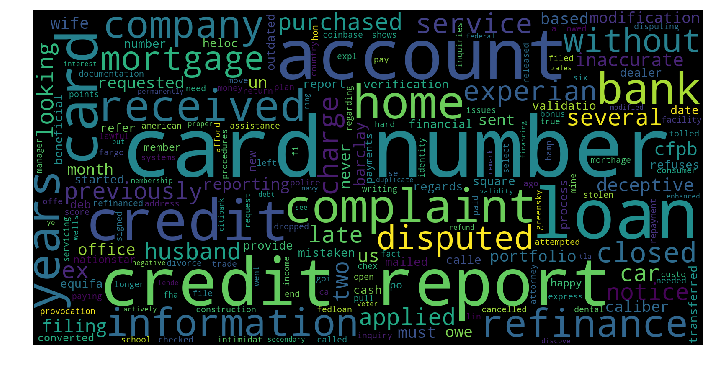

In [11]:
plt.figure(figsize=(12,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [12]:
df.head()

,Complaint_ID,Consumer,clean_Consumer
0,2141773,I have outdated information on my credit repor...,outdated information credit report previously ...
1,2163100,I purchased a new car on XXXX XXXX. The car de...,purchased new car card number car dealer calle...
2,1420702,An account on my credit report has a mistaken ...,account credit report mistaken date mailed deb...
3,1772196,This company refuses to provide me verificatio...,company refuses provide verification validatio...
4,1790634,This complaint is in regards to Square Two Fin...,complaint regards square two financial refer c...


In [109]:
df['Date_received'] = df_data['Date_received']
df.to_csv('data/Clean_Company_public_response.csv', index=False)

# Used LDA and  Lsi and  Hdp  classfication

In [6]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore') 

df = pd.read_csv('data/Clean_Company_public_response.csv')
df.head()

,Complaint_ID,Consumer,clean_Consumer
0,2141773,I have outdated information on my credit repor...,outdated information credit report previously ...
1,2163100,I purchased a new car on XXXX XXXX. The car de...,purchased new car card number car dealer calle...
2,1420702,An account on my credit report has a mistaken ...,account credit report mistaken date mailed deb...
3,1772196,This company refuses to provide me verificatio...,company refuses provide verification validatio...
4,1790634,This complaint is in regards to Square Two Fin...,complaint regards square two financial refer c...


In [7]:
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
from gensim.models.wrappers import LdaMallet
from gensim.corpora import Dictionary
import pyLDAvis.gensim
import gensim
from dask import delayed
import numpy as np
from nltk.tokenize import word_tokenize

import re 
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from package.TextEditor  import EstimateFaster

In [ ]:
#EstimateFaster(num,xlist, description)

# Check best model for n_grams:

In [8]:
%%time
def bag_of_words_for_bigrams(x):
    x = word_tokenize(str(x))
    return x

def bag_of_words_for_Tigrams(x):
    x = word_tokenize(str(x))
    texts = []
    for i in range(len(x)-1):
        
        texts.append('{} {}'.format(x[i],x[i+1]))
    return texts

def make_dictionary(list1):
    bigram = gensim.models.Phrases(list1)
    texts =  [bigram[line] for line in list1]
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    return corpus, dictionary
def evaluate_bar_graph(coherences, indices,title):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    y = np.arange(n)
    #plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    df = pd.DataFrame({'x':coherences,'y':y})
    g = sns.barplot(x='x',y='y', data=df)
    plt.xlabel('Models')
    #plt.xticks(coherences,('bi_grams', 'tri_grams', 'bitri_grams'))
    g.set_xticklabels(indices) 
    plt.title(title)
    plt.ylabel('Coherence Value')

CPU times: user 8 µs, sys: 2 µs, total: 10 µs
Wall time: 16 µs


In [ ]:
%%time
bigrams = df['clean_Consumer'].apply(bag_of_words_for_bigrams)
trigrams = df['clean_Consumer'].apply(bag_of_words_for_Tigrams)
bi_Tri_grams = bigrams+trigrams

In [ ]:
%%time
warnings.filterwarnings("ignore")

corpus_bi, dictionary_bi = make_dictionary(bigrams)
corpus_ti, dictionary_ti = make_dictionary(trigrams)
corpus_biti, dictionary_biti = make_dictionary(bi_Tri_grams)

In [ ]:
%%time

warnings.filterwarnings("ignore")

ldamodel_bi = LdaModel(corpus=corpus_bi, 
                    num_topics=10, id2word=dictionary_bi ,update_every=1, chunksize=100)
ldamodel_ti = LdaModel(corpus=corpus_ti, 
                    num_topics=10, id2word=dictionary_ti);
ldamodel_biti = LdaModel(corpus=corpus_biti, 
                    num_topics=10, id2word=dictionary_biti, passes=25,update_every=1, chunksize=100)

In [ ]:
evaluate_bar_graph([ldamodel_bi , ldamodel_ti, ldamodel_biti],
                   ['bi_grams', 'tri_grams', 'bitri_grams'],"Company_response_to_consumer")

# Check best num_topics models:

In [10]:
%%time
def bag_of_words_for_bigrams(x):
    x = word_tokenize(str(x))
    return x

def bag_of_words_for_Tigrams(x):
    x = word_tokenize(str(x))
    texts = []
    for i in range(len(x)-1):
        
        texts.append('{} {}'.format(x[i],x[i+1]))
    return texts
def make_dictionary(list1):
    bigram = gensim.models.Phrases(list1)
    texts =  [bigram[line] for line in list1]
    dictionary = Dictionary(texts)
    corpus = [dictionary.doc2bow(text) for text in texts]
    
    return corpus, dictionary

CPU times: user 8 µs, sys: 1e+03 ns, total: 9 µs
Wall time: 12.2 µs


In [11]:
%%time
bigrams = df['clean_Consumer'].apply(bag_of_words_for_bigrams)
trigrams = df['clean_Consumer'].apply(bag_of_words_for_Tigrams)
bi_Tri_grams = bigrams+trigrams

CPU times: user 4min 56s, sys: 9.35 s, total: 5min 6s
Wall time: 5min 10s


In [12]:
%%time
warnings.filterwarnings("ignore")
corpus_biti, dictionary_biti = make_dictionary(bi_Tri_grams)

CPU times: user 9min 7s, sys: 2min 16s, total: 11min 24s
Wall time: 12min 44s


In [13]:
from itertools import chain
def find_probability_for_label(ldamodel, corpus):
    
    """
    This finctuion extract problitly for every row according to threshold
    
    """
    lda_corpus = ldamodel[corpus]
    
    #find threshold
    scores = list(chain(*[[score for topic_id,score in topic] \
                          for topic in [doc for doc in lda_corpus]]))
    threshold = sum(scores)/len(scores)
    print('threshold for probability:',threshold)
    
    #extract probability
    probabilityL_list, lebal_list = [],[]
    for ilab in lda_corpus:
        probilityL_list = [ilab[i][1] for i in len(ilab) if  ilab[i][1] > threshold]
        lebal_list = [ ilab[i][0] for i in len(ilab) if  ilab[i][1] > threshold ]
    return probilityL_list,lebal_list
def array_probablity_label(probilityL_list,lebal_list,num_topic):
    List_aray = []
    for labels in lebal_list:
        array = np.zeros(num_topic)
        for la in labels:
            array[la]= probilityL_list[la]
        List_aray.append(array)
    return List_aray

In [89]:
def evaluate_graph_for_max_label(dictionary, corpus, texts, limit):
    """
    Function to display num_topics - LDA graph using c_v coherence
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    limit : topic limit
    
    Returns:
    -------
    lm_list : List of LDA topic models
    c_v : Coherence values corresponding to the LDA model with respective number of topics
    """
    c_v = []
    lm_list = []
    for num_topics in range(1, limit):
        lm = LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary)
        lm_list.append(lm)
        cm = CoherenceModel(model=lm, texts=texts, dictionary=dictionary, coherence='c_v')
        
        c_v.append(cm.get_coherence())
        
    # Show graph
    x = range(1, limit)
    m = (i for i in range(len(c_v)) if c_v[i]==max[c_v])
    print(c_v,m)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()

In [ ]:
%%time
warnings.filterwarnings("ignore")
evaluate_graph_for_max_label(dictionary_biti,corpus_biti, bi_Tri_grams, limit=3)

# Used 3 for num_topics:

In [18]:
%%time
warnings.filterwarnings("ignore")
ldamodel_biti = LdaModel(corpus=corpus_biti, 
                    num_topics=3, id2word=dictionary_biti,update_every=1)

CPU times: user 4min 15s, sys: 10.2 s, total: 4min 25s
Wall time: 4min 31s


In [19]:
ldamodel_biti.save('The_best_model_for_Consumer_complaint_narrative.gensim')

In [20]:
all_topics = ldamodel_biti.show_topics(num_topics=3)

In [31]:
def find_probility_for_label(ldamodel, corpus):
    
    """
    This finctuion extract probability for every row according to threshold
    
    Parameters:
    ----------
    ldamodel : model of LDA
    corpus : Gensim corpus
    
    
    Returns:
    -------
    probabilitylist : probabilitylist list for every row 
    leballist : label for ever row
    """
    lda_corpus = ldamodel[corpus]
    
    #find threshold
    scores = list(chain(*[[score for topic_id,score in topic] \
                          for topic in [doc for doc in lda_corpus]]))
    threshold = sum(scores)/len(scores)
    print('threshold for probability:',threshold)

    lda_corpus = ldamodel[corpus]
    #extract probability
    probabilitylist =[]
    leballist = []
    for n in range(len(lda_corpus)): #len(lda_corpus)
        ilab = lda_corpus[n]
        probabilityL = [ilab[i][1] for i in range(len(ilab)) if  ilab[i][1] > threshold]
        lebal = [ ilab[i][0] for i in range(len(ilab)) if  ilab[i][1] > threshold ]
        #print(probilityL )
        #print(lebal)
        probabilitylist.append(probabilityL)
        leballist.append(lebal)
        
        
    return probabilitylist,leballist

In [78]:
def arrowforlebels(probability_list,lebal_list, num_topics=3):
    """
    This finctuion get  problitly for evry row and compute a mount 
    probability for every class
    
    Parameters:
    ----------
   probabilitylist : probabilitylist list for every row  
    leballist : label for ever row
    
    
    Returns:
    -------
    porb : a probabilitylist for evry class (precent)
    
    
    """
    arrow_probability = []
    for num in range(len(probability_list)):
        k = np.zeros(num_topics)
        for i in range(len(probability_list[num])):
            k[lebal_list[num][i]] = probability_list[num][i]
        arrow_probability.append(k)

    listt = []
    for i in range(num_topics):
        listt.append([])
        for j in range(len(arrow_probability)):
            listt[i].append(arrow_probability[j][i])

    porb = []
    #print(listt)
    listt2 = []
    for i in listt:
        listt2.append(sum(i))
    s= sum(listt2)
    for i in range(len(listt)):
        porb.append(round(sum(listt[i])*100/s,2))
    return porb,arrow_probability


In [51]:
%%time
#probabilitylist,leballist = delayed(find_probility_for_label)(ldamodel_biti, corpus_biti)
#prob = delayed(arrowforlebels)(probability_list,lebal_list)
#prob = prob.compute()
num_topics = 3
probabilitylist,leballist = find_probility_for_label(ldamodel_biti, corpus_biti)
prob,arrow_probability = arrowforlebels(probabilitylist,leballist,num_topics)

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 11 µs


In [80]:
#prob,arrow_probability = 
prob,arrow_probability = arrowforlebels(probabilitylist,leballist,3)

In [91]:
arrow_probability[1]

array([0.        , 0.        , 0.69399375])

Text(0.5, 1.0, 'possible for every class (LDA classfication)')

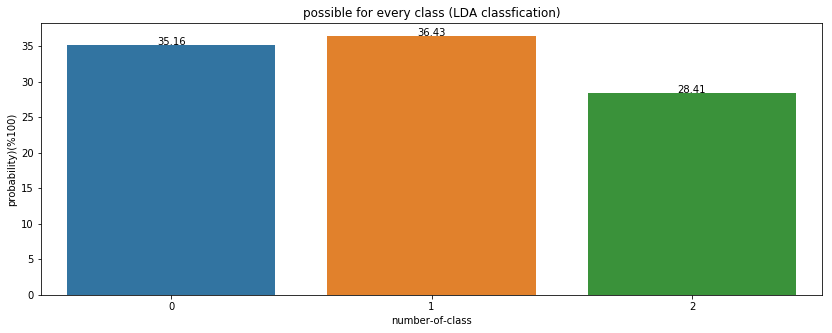

In [82]:
plt.figure(figsize=(14,5))
g = sns.barplot(x=np.arange(0,3),y=prob)
for i in range(3):
      g.text(i,prob[i], round(prob[i],2), color='black', ha="center")
plt.xlabel("number-of-class")
plt.ylabel('probability)(%100)')
plt.xtick(['not-good','bad','so-bad'])
plt.title('possible for every class (LDA classfication)')

In [93]:
plt.figure(figsize=(10,8))
p = pyLDAvis.enable_notebook()
p = pyLDAvis.gensim.prepare(ldamodel_biti, corpus_biti, dictionary_biti)

<Figure size 720x576 with 0 Axes>

In [96]:
plt.figure(figsize=(10,8))
p

PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
0      40.676273        1       1 -0.115309  0.133795
2      33.718109        1       2 -0.116337 -0.133400
1      25.605619        1       3  0.231646 -0.000395, topic_info=     Category           Freq                     Term          Total  loglift  \
term                                                                            
67    Default  704655.000000              card_number  704655.000000  30.0000   
248   Default  263354.000000                  account  263354.000000  29.0000   
136   Default  119703.000000                     loan  119703.000000  28.0000   
521   Default  125629.000000  number card_card number  125629.000000  27.0000   
2     Default   70757.000000            credit_report   70757.000000  26.0000   
1052  Default   92489.000000                     card   92489.000000  25.0000   
424   Default   82903.000000  card number_number card   82903.000000  24.0000   
1205  Default   60019.000000                   report   60019.000000  23.0000   
384   Default   70306.000000                     debt   70306.000000  22.0000   
44    Default   79094.000000                     bank   79094.000000  21.0000   
1166  Default  121756.000000                   credit  121756.000000  20.0000   
5     Default  104841.000000              information  104841.000000  19.0000   
668   Default   58736.000000                 mortgage   58736.000000  18.0000   
2160  Default   31558.000000                reporting   31558.000000  17.0000   
892   Default   27485.000000                  equifax   27485.000000  16.0000   
178   Default  118688.000000                  payment  118688.000000  15.0000   
871   Default   43868.000000                 accounts   43868.000000  14.0000   
1552  Default   30703.000000                 reported   30703.000000  13.0000   
271   Default   35758.000000                  dispute   35758.000000  12.0000   
280   Default   20256.000000                 experian   20256.000000  11.0000   
1257  Default   22109.000000               collection   22109.000000  10.0000   
762   Default   35103.000000                     home   35103.000000   9.0000   
238   Default  125765.000000                     told  125765.000000   8.0000   
68    Default   34377.000000                    check   34377.000000   7.0000   
2132  Default   18836.000000           credit_bureaus   18836.000000   6.0000   
8191  Default   17167.000000               transunion   17167.000000   5.0000   
1711  Default   18477.000000                  inquiry   18477.000000   4.0000   
141   Default   27132.000000                    loans   27132.000000   3.0000   
3     Default   16548.000000         credit_reporting   16548.000000   2.0000   
989   Default   60366.000000                 payments   60366.000000   1.0000   
...       ...            ...                      ...            ...      ...   
1678   Topic3    5748.951660                 not_mine    5758.137695   1.3608   
4836   Topic3   11657.565430                 agencies   11783.855469   1.3516   
4228   Topic3    4077.622803            credit report    4078.889404   1.3620   
1205   Topic3   57777.859375                   report   60019.234375   1.3243   
1711   Topic3   17989.068359                  inquiry   18477.738281   1.3356   
1356   Topic3    5858.257812               inaccurate    5901.209473   1.3551   
1257   Topic3   21286.673828               collection   22109.570312   1.3244   
2192   Topic3   11034.856445        collection_agency   11321.484375   1.3367   
884    Topic3    9955.364258            credit_bureau   10208.649414   1.3372   
424    Topic3   74100.359375  card number_number card   82903.796875   1.2501   
521    Topic3  100440.429688  number card_card number  125629.328125   1.1386   
384    Topic3   57116.710938                     debt   70306.015625   1.1546   
1552   Topic3   26125.687500              

<Figure size 720x576 with 0 Axes>

In [94]:
pyLDAvis.save_html(p, 'lda_for_Consumer_complaint_narrative.html')

In [110]:
df.head()

,Complaint_ID,Consumer,clean_Consumer,Date_received
0,2141773,I have outdated information on my credit repor...,outdated information credit report previously ...,10/01/2016
1,2163100,I purchased a new car on XXXX XXXX. The car de...,purchased new car card number car dealer calle...,10/17/2016
2,1420702,An account on my credit report has a mistaken ...,account credit report mistaken date mailed deb...,06/15/2015
3,1772196,This company refuses to provide me verificatio...,company refuses provide verification validatio...,02/03/2016
4,1790634,This complaint is in regards to Square Two Fin...,complaint regards square two financial refer c...,02/17/2016
